# Optimización de Parametros.

# Entrenar el modelo con keras y tensorflow

1. **Cargue las librerias que necesite:numpy, matplotlib.pyplot,etc.**


2. **Para cargar las librerias utilice  import seguido del nombre de la libreria y de un alias (as).Ejemplo import pandas as pd**


3.   **Ejecute de forma secuencial de arriba hacia abajo las celdas de código dando click al boton play o ctrl+enter**
   
4. **Al ejecutar la celda debe marcar un check en color verde al lado izquierdo de la celda de código y en el menu de google colab en la parte superior derecha, se debe activar Ram y Disco con un check verde.**


5. **El simbolo # es para comentarios dentro del código.**

6. **Para subir un archivo a google colab se puede hacer click en la parte izquierda, donde aparace una carpeta y le da click al simbolo de una hoja con la flecha hacia arriba cargar archivo al almacenamiento de sesión.**

Mnist un conjunto que esta dentro de keras.

Conjunto de números escritos a mano digitalizados.

Los números son:0,1,2,3,4,5,6,7,8,9

En total son 10 números.

Estos números estan en un dataset en keras.

Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total por cada imágen). Se utiliza una división  del conjunto de datos para evaluar y comparar modelos, en la que se utilizan 60.000 imágenes para formar un modelo(training) y un conjunto separado de 10.000 imágenes para probarlo(test)

**Para guardar el modelo se instala la libreria h5py**

In [ ]:
pip install h5py


**Observemos las imágenes de los numeros en escala de grises**


1.   x_train:entrada de la red neuronal(entrenar la red)
2.   y_train:salida de la red neuronal(entrenar la red)
3. x_test:entrada de prueba del red neuronal(probrando la red neuronal)
4. y_test:salida de prueba de la red neuronal(probrando la red neuronal)
5. mnist.load_data():Carga los números



Para graficar los números.

* Se puede escribir subplot(224) ó subplot(2,2,4)
* Especifica num_filas, num_columnas, numplot



11490434/11490434 [==============================] - 0s 0us/step


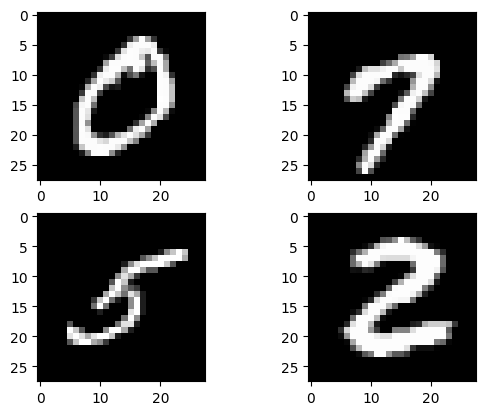

Número total de muestras en x_train: 60000 60000


In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# cargar (descargar si es necesario) el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# plot 4 imagenes en escala de grises
plt.subplot(2,2,1)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2)
plt.imshow(x_train[15], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3)
plt.imshow(x_train[35], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[25], cmap=plt.get_cmap('gray'))
# Muestra el gráfico de los 4 numeros
plt.show()
numero_de_muestras_x = len(x_train)
numero_de_muestras_y = len(y_train)
print("Número total de muestras en x_train:", numero_de_muestras_x, numero_de_muestras_y)

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras import utils
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Cargar datos
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)(salida)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0 #(se divide por 255 pixeles,para tener numeros entre 0 y 1)
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# Cambiar a un formato por categorias (10 debibo a los numeros 0,1,2..9)
y_train = utils.to_categorical(y_train,num_classes=10)
y_test = utils.to_categorical(y_test,num_classes=10)

# Cree un modelo, ingrese 784 neuronas y genere 10 neuronas
# la activacion softmax es para dar la probabilidad del numero
model = Sequential([
        Dense(units=10,input_dim=784,bias_initializer='one',activation='softmax')
    ])

# Definir optimizador sgd (stochastic gradient descent),  lr( learning rate) o (tasa de aprendizaje =.02)
sgd = SGD(lr=0.2) # varie este valor

# Definir optimizador, función de pérdida, precisión de cálculo durante el entrenamiento
model.compile(
    optimizer = sgd,
    loss = 'mse',# funcion de perdida mse(error cuadratico media)
    metrics=['accuracy'],# metrica, efectividad del modelo
)

#  Entrenamiento del modelo
# batch_size= Es el numero de datos que tiene cada iteración
#de un ciclo (epoch), esto es util porqué la red
#neuronal actualiza los parametros W (pesos)


# epochs=Este es el número de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation.
#En cada ciclo (epoch) todos los datos de entrenamiento pasan por la red neuronal
# para que esta aprenda sobre ellos, si existen 10 ciclos y 1000 datos,
# en cada ciclo los 1000 datos pasaran por la red neuronal

model.fit(x_train,y_train,batch_size=64,epochs=5)

#  Evaluación del modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test,y_test)

print('\ntest loss',loss)
print('accuracy',accuracy)
# Guardar el modelo con extension .h5
model.save('modeloinicial.h5')# pip install h5py

x_shape: (60000, 28, 28)
y_shape: (60000,)


Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0874 - accuracy: 0.2406
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0820 - accuracy: 0.3527
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0766 - accuracy: 0.4374
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0713 - accuracy: 0.5269
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.6741

test loss 0.06183021888136864
accuracy 0.6740999817848206


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000, 10)

**Cargar el modeloinicial.h5**

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras import utils
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
# Cargar datos
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# Cambiar a un formato de categorias son 10 (el numero total de números)
y_train = utils.to_categorical(y_train,num_classes=10)
y_test = utils.to_categorical(y_test,num_classes=10)

# Carga el modelo.
model = load_model('modeloinicial.h5')

# Evaluar el modelo.
loss,accuracy = model.evaluate(x_test,y_test)

print('\ntest loss',loss)
print('accuracy',accuracy)

# Modelo de entrenamiento,ajustar el modelo
model.fit(x_train,y_train,batch_size=64,epochs=2)

# Modelo de evaluación
loss,accuracy = model.evaluate(x_test,y_test)

print('\ntest loss',loss)
print('accuracy',accuracy)

# Guardar parámetros, cargar parámetros(pesos)
model.save_weights('model_pesos.h5')
model.load_weights('model_pesos.h5')
# Guardar la estructura de la red, cargar la estructura de red
from keras.models import model_from_json
json_string = model.to_json()
model = model_from_json(json_string)

print(json_string)

x_shape: (60000, 28, 28)
y_shape: (60000,)
313/313 [==============================] - 1s 3ms/step - loss: 0.0608 - accuracy: 0.6639

test loss 0.060758721083402634
accuracy 0.6639000177383423
Epoch 1/2
938/938 [==============================] - 3s 3ms/step - loss: 0.0585 - accuracy: 0.6730
Epoch 2/2
313/313 [==============================] - 1s 2ms/step - loss: 0.0511 - accuracy: 0.7114

test loss 0.05111900344491005
accuracy 0.7113999724388123
{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 784], "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name"

**Imprimir las capas del modelo de red neuronal**

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Para hacer la prediccion de la imagen , la probabilidad debe sumar 1.

In [ ]:

prediccion = model.predict(x_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
prediccion[1]

array([0.10821267, 0.08324081, 0.08672915, 0.1077533 , 0.08698561,
       0.06872308, 0.09885298, 0.14837672, 0.07814749, 0.13297826],
      dtype=float32)

In [ ]:
suma_total = np.sum(prediccion[1])

print("La suma de todos los elementos del array es:", suma_total)

La suma de todos los elementos del array es: 1.0


In [ ]:
prediccion[0]

array([0.14683746, 0.1088042 , 0.12151056, 0.09870118, 0.11457261,
       0.1051899 , 0.09806192, 0.05466969, 0.08485193, 0.06680054],
      dtype=float32)

**La probabilidad debe sumar 1**

In [ ]:
0.06925007+ 0.06983136+ 0.15717739+ 0.08532973+ 0.14593339+0.11683442+ 0.12002686+ 0.05671936+ 0.0980637 + 0.08083368

0.9999999599999999

**Cada valor corresponde a la probabilidad que sea el numero 0,1,2,3 hasta el 9.**

**Esta probabilidad sale cuando definimos el modelo de la red neuronal secuencial utilizando activation='softmax'**

# **Realice lo siguiente:**


*   Modifique el tipo de optimizador por ejemplo optimizer='adam'
*   Modifique los valores de learning rate, ejemplo lr=0.001

*   Modifique epochs,batch_size,ejemplo epochs=10, batch_size=200

*   Agregue una capa oculta al modelo con 784 neuronas.

*   Modifique Dropout, ejemplo Dropout=0.2. Esto permite excluir aleatoriamente el 20% de las neuronas en el entrenamiento para evitar el sobreajuste

*    Evalue el modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test,y_test)



*   Modifique loss dentro de model.compile(), ejemplo loss='categorical_crossentropy'

*   Imprima las capas de neuronas del modelo print(model.summary())

*   Guarde el modelo model.save('modeloinicial.h5')# pip install h5py

*  Guarde los pesos del modelo mediante: model.save_weights('model_pesos.h5')



In [ ]:
import keras
import numpy as np
from keras.datasets import mnist #se importa el dataset MNIST
from keras import utils #se importa Utils la cual proporciona funciones auxiliares
from keras.models import Sequential #Modelo de red neuronal secuencial donde hay una entrada y una salida y pasa por varias capas neuronales una tras de otra
from keras.layers import Dense, Dropout #Dense: Capa de la red neuronal donde todas las neuronas se conectan con las capas anteriores
from keras.layers import Dropout #Droput se refiere a un metodo para evitar el sobre ajuste generalizando mas el sistema mediante la exclusión de algunas neuronas para crear una mayor independencia en las restantes.
from tensorflow.keras.optimizers import SGD, Adam # se importa optimizadores que son algoritmos para modificar los pesos y sesgos durante el entrenamiento para minimizar la función de perdida


#--------------------------------------------------------------------------------------------------------------------------------
#Se definen los hiperparametros

batch_size=64 # El batch size es la cantidad de ejemplos que va a utilizar el modelo al tiempo para actualizar los pesos en una sola iteración.
n_inputs = 784 # Se define el numero de entradas, 28x28 pixeles  para "aplanar" las imagenes en vectores de 784 elementos
n_classes = 10 #Numero de clases de salida del modelo para predecir(Digitos del 0 al 9)
epochs = 12 # Numero de epocas durante el entrenamiento del modelo
n_neurons = 784 #Numero de neuronas en la capa oculta del modelo
dropout=0.25 #Un porcentaje de las neuronas se "apaga" aleatoriamente para evitar el sobreajuste
optimizer_type = Adam #optimizador a utilizar para minimizar la función de perdida
lr=0.00015 # Tasa de aprendizaje inicial para el optimizador,
loss='categorical_crossentropy' # la función de perdida que el modelo va a intentar minimizar durante el entrenamiento

#---------------------------------------------------------------------------------------------------------------------------------

#Preparación de Datos

# Cargar datos
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)(salida)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0 #(se divide por 255 pixeles,para tener numeros entre 0 y 1)
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# Cambiar a un formato por categorias (10 debibo a los numeros 0,1,2..9)
y_train = utils.to_categorical(y_train,n_classes)
y_test = utils.to_categorical(y_test,n_classes)

#---------------------------------------------------------------------------------------------------------------------------------
#creación del modelo secuencial

model = Sequential([Dense(units=n_neurons,input_dim=n_inputs,bias_initializer='one',activation='relu')])
model.add(Dropout(dropout))
model.add(Dense(units=n_classes, activation='softmax'))

#----------------------------------------------------------------------------------------------------------------------------------
#Configuración del Entrenamiento

# Definir optimizador
optim = optimizer_type(lr=lr) # varie este valor

# Definir optimizador, función de pérdida, precisión de cálculo durante el entrenamiento
model.compile(
    optimizer = optim,
    loss = loss,# funcion de perdida
    metrics=['accuracy'],# metrica, efectividad del modelo
)

#----------------------------------------------------------------------------------------------------------------------
#Entrenamiento del modelo

model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs)

#----------------------------------------------------------------------------------------------------------------------
#  Evaluación del modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test,y_test)
#--------------------------------------------------------------------------------------------------------------------------------------
print('\ntest loss',loss)
print('accuracy',accuracy)
# Guardar el modelo con extension .h5
model.save('modeloinicial.h5')# pip install h5pyresponde a lo solicitado  agregue mas celdas de código si lo necesita.
model.save_weights('model_pesos.h5')

x_shape: (60000, 28, 28)
y_shape: (60000,)


Epoch 1/12
938/938 [==============================] - 14s 14ms/step - loss: 0.3161 - accuracy: 0.9054
Epoch 2/12
938/938 [==============================] - 13s 14ms/step - loss: 0.1419 - accuracy: 0.9577
Epoch 3/12
938/938 [==============================] - 14s 15ms/step - loss: 0.0956 - accuracy: 0.9704
Epoch 4/12
938/938 [==============================] - 13s 14ms/step - loss: 0.0701 - accuracy: 0.9779
Epoch 5/12
938/938 [==============================] - 14s 15ms/step - loss: 0.0550 - accuracy: 0.9822
Epoch 6/12
938/938 [==============================] - 14s 14ms/step - loss: 0.0455 - accuracy: 0.9852
Epoch 7/12
938/938 [==============================] - 14s 15ms/step - loss: 0.0385 - accuracy: 0.9876
Epoch 8/12
938/938 [==============================] - 14s 15ms/step - loss: 0.0322 - accuracy: 0.9895
Epoch 9/12
938/938 [==============================] - 15s 15ms/step - loss: 0.0263 - accuracy: 0.9913
Epoch 10/12
938/938 [==============================] - 14s 15ms/step - loss: 0.024

In [ ]:
prediccion = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediccion[9999]

array([1.54909173e-07, 1.11235146e-08, 5.17999688e-08, 1.21742303e-07,
       1.89558727e-06, 6.60492151e-06, 9.99991119e-01, 1.94558175e-10,
       2.05591828e-08, 1.31638700e-09], dtype=float32)

In [ ]:
suma_total = np.sum(prediccion[1])

print("La suma de todos los elementos del array es:", suma_total)

La suma de todos los elementos del array es: 0.9999999


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               615440    
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623290 (2.38 MB)
Trainable params: 623290 (2.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
